In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [11]:
df = df[df['job_title_short'] == 'Data Analyst']

df_exploded = df.explode('job_skills')
skill_Stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)
skill_Stats = skill_Stats.sort_values('skill_count', ascending=False).head(10)

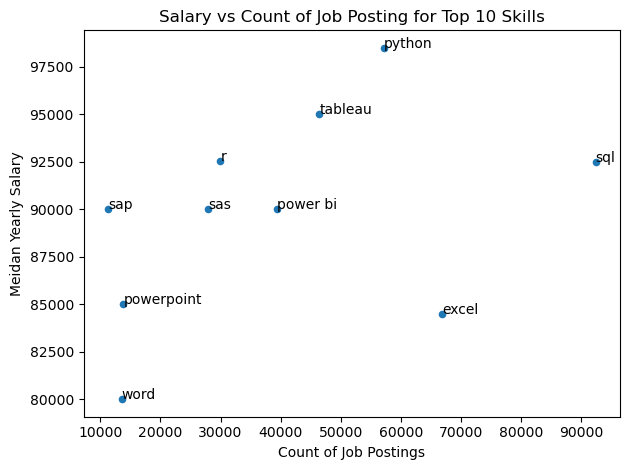

In [15]:
# Creating Scatter Plot
skill_Stats.plot(kind='scatter', x='skill_count', y='median_salary', title='Data Analyst')
plt.xlabel('Count of Job Postings')
plt.ylabel('Meidan Yearly Salary')
plt.title('Salary vs Count of Job Posting for Top 10 Skills')
plt.tight_layout()

# Creating a for loop for names to be added to the plot
for i, txt in enumerate(skill_Stats.index):
    plt.text(skill_Stats['skill_count'].iloc[i], skill_Stats['median_salary'].iloc[i], txt)
plt.show()